In [107]:
!pip install missingno

In [108]:
#data analysing phase
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
pd.pandas.set_option('display.max_columns',None)
import datetime
from datetime import timedelta

In [109]:
df_ap=pd.read_csv("C:\\Users\\sarit\\Downloads\\archive (5)\\application_record.csv")


In [110]:
df_credit=pd.read_csv("C:\\Users\\sarit\\Downloads\\archive (5)\\credit_record.csv")

In [111]:
df_ap.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [112]:
df_credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [113]:
df_ap.shape

(438557, 18)

In [114]:
df_credit.shape

(1048575, 3)

In [115]:
df_ap.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

In [116]:
df_credit.nunique()

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64

In [117]:
df_ap.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

we can see that there are null values in the occupation_type column

In [118]:
df_credit.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [119]:
df_ap['OCCUPATION_TYPE'].value_counts()

Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: OCCUPATION_TYPE, dtype: int64

In [120]:
df_ap['OCCUPATION_TYPE'].isnull().value_counts()

False    304354
True     134203
Name: OCCUPATION_TYPE, dtype: int64

In [121]:
import pandas as pd

#we are filling missing values with mode imputation
most_frequent_occupation = df_ap['OCCUPATION_TYPE'].mode()[0]
df_ap['OCCUPATION_TYPE'].fillna(most_frequent_occupation, inplace=True)


In [122]:
df_ap['OCCUPATION_TYPE'].isnull().sum()

0

Now we can see there are no null values in occupation_type

In [123]:
#merging two datasets
df = df_ap.merge(df_credit,on='ID',how='inner')

In [124]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,-4,C


In [125]:
df.shape

(777715, 20)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [127]:
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
count,7.777150e+05,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000
mean,5.078743e+06,0.428082,1.885348e+05,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,2.208837,-19.373564
std,4.180442e+04,0.745755,1.016225e+05,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,0.907380,14.082208
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,5.044568e+06,0.000000,1.215000e+05,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000,-29.000000
50%,5.069530e+06,0.000000,1.620000e+05,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000,-17.000000
75%,5.115551e+06,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000,-8.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


In [128]:
df.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64

In [129]:
df.duplicated().sum()

0

In [130]:
df['ID'].duplicated().sum()

741258

But from the above data we can see that there are many records with the same ID. we have to drop them.Before that lets do the EDA process.

# Exploratory Data Analysis

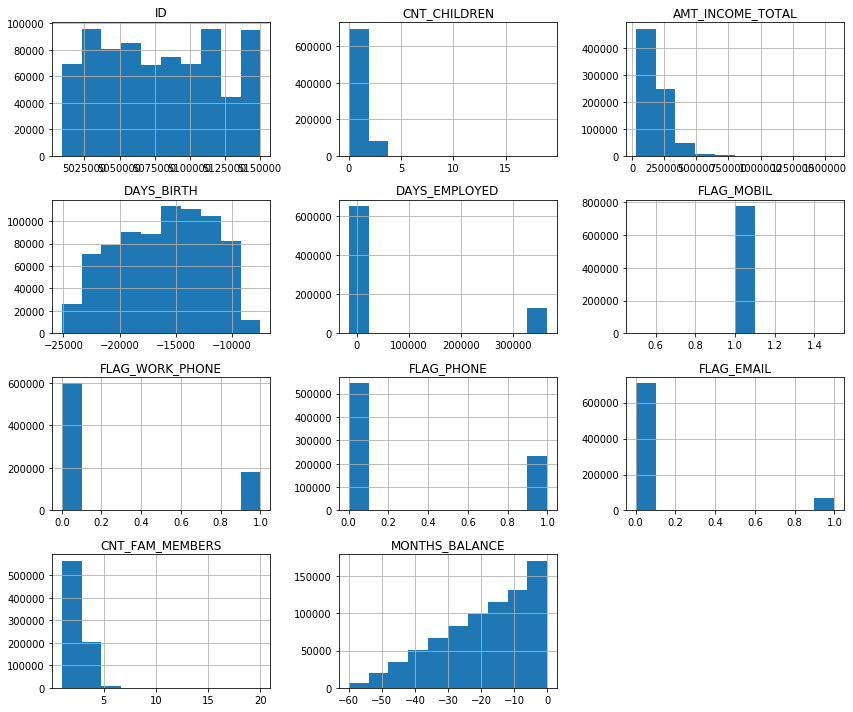

In [131]:
# Histograms for numerical columns
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

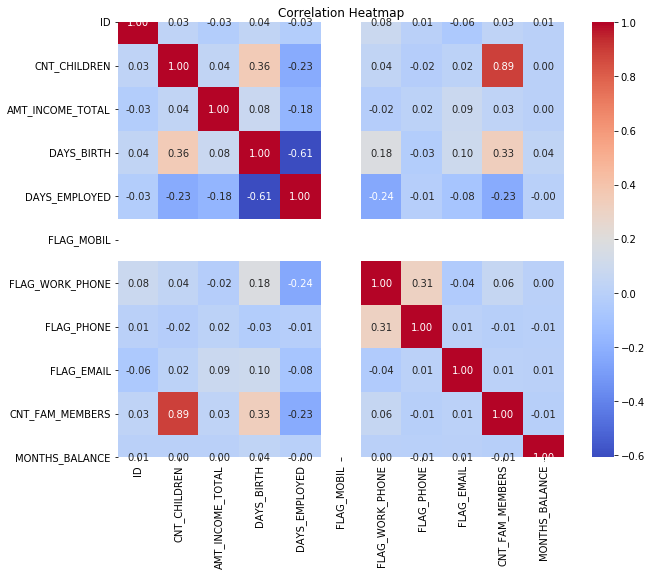

In [132]:
# Correlation heatmap for numerical columns
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

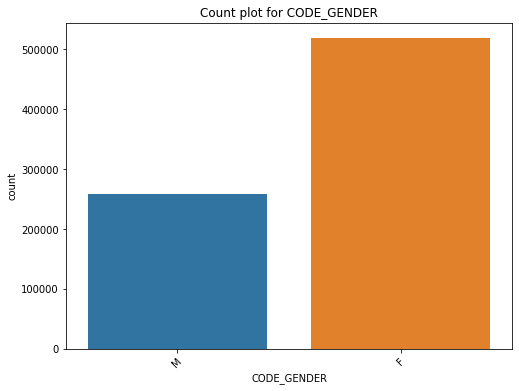

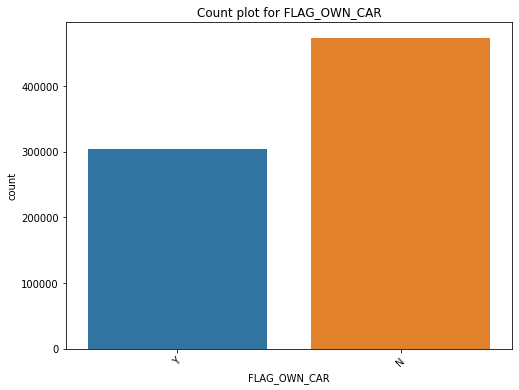

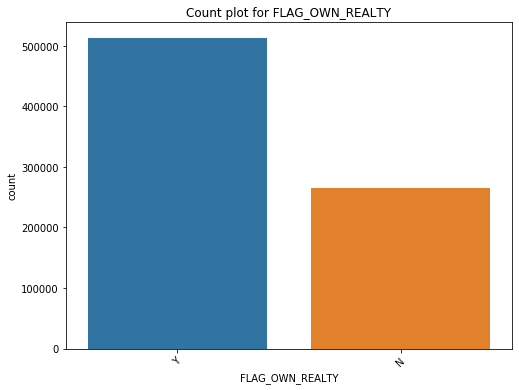

In [133]:
# Bar plots or count plots for categorical columns
categorical_columns = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']  # Replace with actual categorical columns
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Count plot for {column}')
    plt.xticks(rotation=45)
    plt.show()

In [134]:
# Example non-numeric columns for visualization
non_numeric_columns = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']


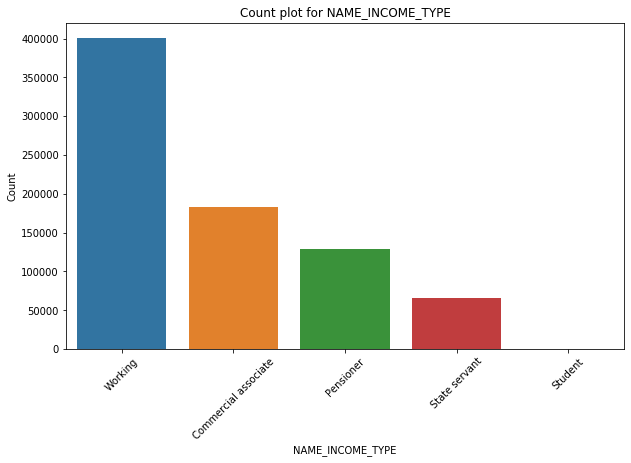

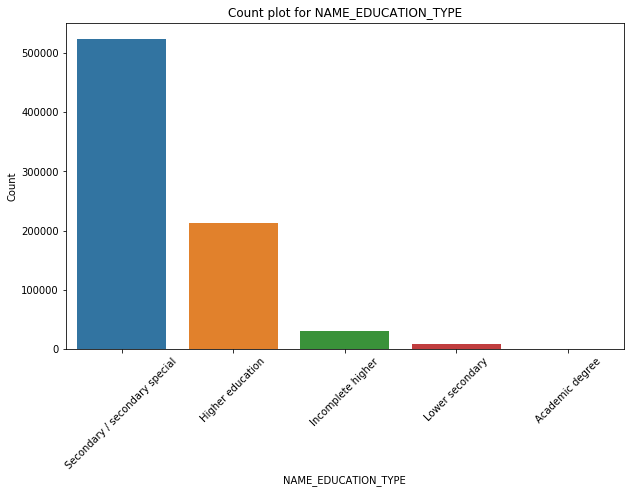

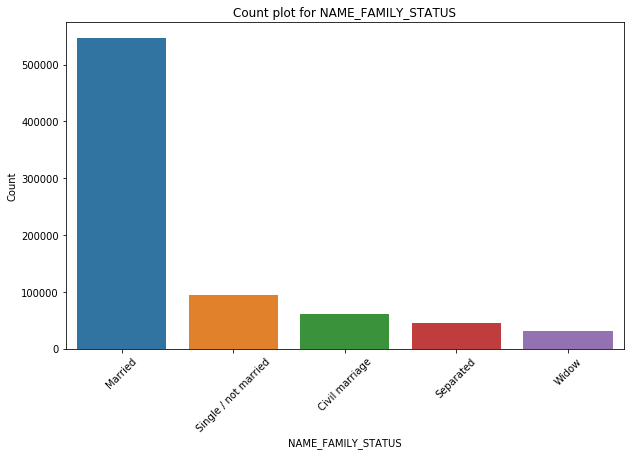

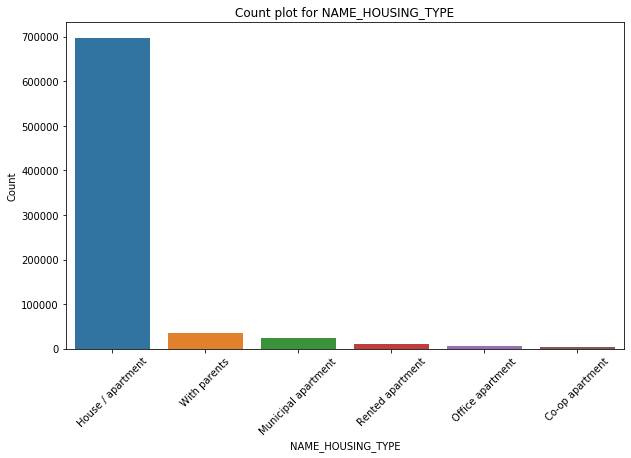

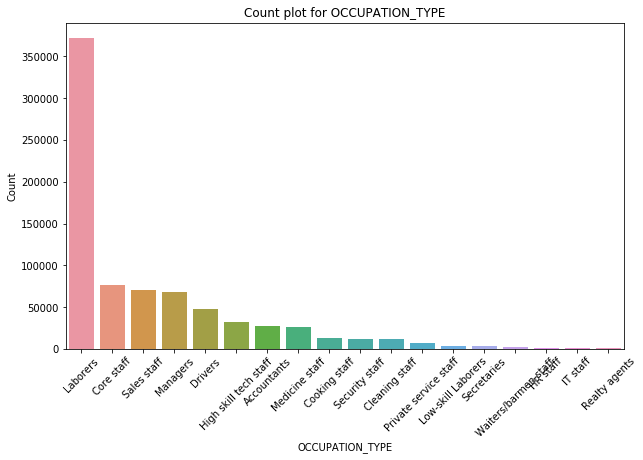

In [143]:
# Visualizing count plots for non-numeric columns
for column in non_numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Count plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Handling Missing Data

In [144]:
# Check for duplicate rows based on the 'ID' column
duplicated_rows = df[df.duplicated(subset='ID', keep=False)]

In [145]:
# Remove duplicates based on the 'ID' column, keeping the first occurrence
df.drop_duplicates(subset='ID', keep='first', inplace=True)

In [146]:
df['ID'].duplicated().sum()

0

In [147]:
# Define features and target variable
features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
            'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']
target = 'STATUS'  # STATUS' is the  target column from df_credit

In [148]:
# Encode categorical variables
df = pd.get_dummies(df, columns=features)

In [150]:
from sklearn.impute import SimpleImputer

# Columns with missing values (e.g., 'OCCUPATION_TYPE' in this case)
columns_with_missing = ['OCCUPATION_TYPE']

# Handling missing values in non-numeric columns using most frequent strategy
for column in columns_with_missing:
    imputer = SimpleImputer(strategy='most_frequent')
    df[column] = imputer.fit_transform(df[[column]])


In [153]:
df['OCCUPATION_TYPE'].isnull().sum()

0

In [165]:
from sklearn.preprocessing import LabelEncoder

# Example: Apply label encoding to categorical columns
label_encoder = LabelEncoder()

# As 'OCCUPATION_TYPE' is a categorical column in your DataFrame
df['OCCUPATION_TYPE'] = label_encoder.fit_transform(df['OCCUPATION_TYPE'])

# Data Splitting

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [167]:
X = df.drop(columns=[target])
y = df[target]

In [168]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [169]:
X_train.shape

(29165, 311)

In [170]:
X_test.shape

(7292, 311)

In [171]:
y_train.shape

(29165,)

In [172]:
y_test.shape

(7292,)

# RandomForest Classifier

In [173]:
# Model Building (Random Forest Classifier as an example)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [176]:
# Make predictions
y_pred = rf.predict(X_test)

In [187]:
# Model Evaluation
rf_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {rf_acc}")

# Precision, Recall, F1-score
print(classification_report(y_test, y_pred))

# Confusion Matrix
rf_conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{rf_conf_matrix}")

Accuracy: 0.5725452550740537
              precision    recall  f1-score   support

           0       0.44      0.37      0.40      1663
           1       0.06      0.04      0.05        50
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         1
           5       0.20      0.14      0.17        14
           C       0.62      0.71      0.66      3597
           X       0.57      0.51      0.54      1959

    accuracy                           0.57      7292
   macro avg       0.27      0.25      0.26      7292
weighted avg       0.56      0.57      0.56      7292

Confusion Matrix:
[[ 616    5    0    0    1  773  268]
 [  13    2    0    0    0   29    6]
 [   1    1    0    0    0    5    1]
 [   0    0    0    0    0    1    0]
 [   2    1    0    0    2    8    1]
 [ 549   19    0    0    5 2554  470]
 [ 230    6    0    0    2  720 1001]]


C:\Common Files\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Common Files\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Common Files\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression

In [190]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predict on test data
logreg_preds = logreg.predict(X_test)

# Evaluate the model
logreg_accuracy = accuracy_score(y_test, logreg_preds)
logreg_report = classification_report(y_test, logreg_preds)
logreg_conf_matrix = confusion_matrix(y_test, logreg_preds)

print(f"Accuracy: {logreg_accuracy}")
print(f"Classification Report:\n{logreg_report}")
print(f"Confusion Matrix:\n{logreg_conf_matrix}")


Accuracy: 0.4932803071859572
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1663
           1       0.00      0.00      0.00        50
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        14
           C       0.49      1.00      0.66      3597
           X       0.00      0.00      0.00      1959

    accuracy                           0.49      7292
   macro avg       0.07      0.14      0.09      7292
weighted avg       0.24      0.49      0.33      7292

Confusion Matrix:
[[   0    0    0    0    0 1663    0]
 [   0    0    0    0    0   50    0]
 [   0    0    0    0    0    8    0]
 [   0    0    0    0    0    1    0]
 [   0    0    0    0    0   14    0]
 [   0    0    0    0    0 3597    0]
 [   0    0    0    0    0 1959    0]]


C:\Common Files\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Common Files\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Common Files\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Gradient Boosting

In [191]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and train the model
gradient_boost = GradientBoostingClassifier(random_state=42)
gradient_boost.fit(X_train, y_train)

# Predict on test data
gradient_preds = gradient_boost.predict(X_test)

# Evaluate the model
gradient_accuracy = accuracy_score(y_test, gradient_preds)
gradient_report = classification_report(y_test, gradient_preds)
gradient_conf_matrix = confusion_matrix(y_test, gradient_preds)

print(f"Accuracy: {gradient_accuracy}")
print(f"Classification Report:\n{gradient_report}")
print(f"Confusion Matrix:\n{gradient_conf_matrix}")


Accuracy: 0.526055951727921
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.02      0.04      1663
           1       0.05      0.02      0.03        50
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           5       0.27      0.21      0.24        14
           C       0.53      0.89      0.66      3597
           X       0.54      0.30      0.39      1959

    accuracy                           0.53      7292
   macro avg       0.24      0.18      0.17      7292
weighted avg       0.52      0.53      0.44      7292

Confusion Matrix:
[[  36    6    0    0    0    2 1472  147]
 [   0    1    0    0    0    0   49    0]
 [   0    0    0    0    0    0    8    0]
 [   0    0    0    0    0    0    1    0]
 [   0    0    0    0    0    0    0    0]
 [   0    1    0    0    0    3    9    1]
 [  22   10    0    0 

C:\Common Files\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Common Files\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Common Files\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Common Files\New folder\lib\site-packages\sklearn\metr

# Decision Tree Classifier

In [193]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict on test data
decision_tree_preds = decision_tree.predict(X_test)

# Evaluate the model
decision_tree_accuracy = accuracy_score(y_test, decision_tree_preds)
decision_tree_report = classification_report(y_test, decision_tree_preds)
decision_tree_conf_matrix = confusion_matrix(y_test, decision_tree_preds)

print(f"Accuracy: {decision_tree_accuracy}")
print(f"Classification Report:\n{decision_tree_report}")
print(f"Confusion Matrix:\n{decision_tree_conf_matrix}")


C:\Common Files\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Common Files\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Common Files\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5186505759736698
Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.38      0.38      1663
           1       0.05      0.04      0.04        50
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         1
           5       0.14      0.14      0.14        14
           C       0.61      0.61      0.61      3597
           X       0.49      0.49      0.49      1959

    accuracy                           0.52      7292
   macro avg       0.24      0.24      0.24      7292
weighted avg       0.52      0.52      0.52      7292

Confusion Matrix:
[[ 629    9    0    0    1  690  334]
 [  16    2    0    0    0   24    8]
 [   1    1    0    0    0    5    1]
 [   0    0    0    0    0    0    1]
 [   1    1    0    0    2    8    2]
 [ 716   22    0    0    6 2194  659]
 [ 302    8    0    0    5  689  955]]
